### Merging, Joining & Concatenating Data

In [269]:
import pandas as pd

#### Merge

![Alt text](image-2.png)

In [318]:
# df1 = pd.read_csv(r"C:\Users\jp\OneDrive\Documents\LOTR.csv")
df1 = pd.read_csv('/Users/Z00CVY1/Documents/Python Tutorials/demo files/LOTR.csv')
df1

,FellowshipID,FirstName,Skills
0,1001,Frodo,Hiding
1,1002,Samwise,Gardening
2,1003,Gandalf,Spells
3,1004,Pippin,Fireworks


In [319]:
df2 = pd.read_csv('/Users/Z00CVY1/Documents/Python Tutorials/demo files/LOTR 2.csv')
df2

,FellowshipID,FirstName,Age
0,1006,Legolas,2931
1,1007,Elrond,6520
2,1008,Barromir,51
3,1001,Frodo,50
4,1002,Samwise,39


In [285]:
df1.merge(df2, how = 'left', on = ['FellowshipID'])

,FellowshipID,FirstName_x,Skills,FirstName_y,Age
0,1001,Frodo,Hiding,Frodo,50.0
1,1002,Samwise,Gardening,Samwise,39.0
2,1003,Gandalf,Spells,NaN,NaN
3,1004,Pippin,Fireworks,NaN,NaN


In [334]:
df1.merge(df2)

,FellowshipID,FirstName,Age,Skills
0,1001,Frodo,50,Hiding
1,1002,Samwise,39,Gardening


In [9]:
df1

,FellowshipID,FirstName,Skills
0,1001,Frodo,Hiding
1,1002,Samwise,Gardening
2,1003,Gandalf,Spells
3,1004,Pippin,Fireworks




df1 left df2 : intersection + df1 remainign
df2 right df1 : intersection + df1 remainign

A U B = B U A

A ints B =  B intsc A

A LJ B = B RJ A

A RJ B = B LJ A

In [339]:
df1.merge(df2, how = 'left')
df2.merge(df1, how = 'right')

,FellowshipID,FirstName,Age,Skills
0,1001,Frodo,50.0,Hiding
1,1002,Samwise,39.0,Gardening
2,1003,Gandalf,NaN,Spells
3,1004,Pippin,NaN,Fireworks


In [287]:
df1.merge(df2, how = 'right')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39
2,1006,Legolas,NaN,2931
3,1007,Elrond,NaN,6520
4,1008,Barromir,NaN,51


In [16]:
df1.merge(df2, how = 'outer')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
4,1006,Legolas,NaN,2931.0
5,1007,Elrond,NaN,6520.0
6,1008,Barromir,NaN,51.0


1   a
2   b
3   c

1a
1b
1c
2a
2b
2c
3a
3b
3c

a_rows b_rows
a*b number of rows

In [ ]:
df1.merge(df2, how = 'cross')

,FellowshipID_x,FirstName_x,Skills,FellowshipID_y,FirstName_y,Age
0,1001,Frodo,Hiding,1001,Frodo,50
1,1001,Frodo,Hiding,1002,Samwise,39
2,1001,Frodo,Hiding,1006,Legolas,2931
3,1001,Frodo,Hiding,1007,Elrond,6520
4,1001,Frodo,Hiding,1008,Barromir,51
5,1002,Samwise,Gardening,1001,Frodo,50
6,1002,Samwise,Gardening,1002,Samwise,39
7,1002,Samwise,Gardening,1006,Legolas,2931
8,1002,Samwise,Gardening,1007,Elrond,6520
9,1002,Samwise,Gardening,1008,Barromir,51


In [17]:
df2

,FellowshipID,FirstName,Age
0,1001,Frodo,50
1,1002,Samwise,39
2,1006,Legolas,2931
3,1007,Elrond,6520
4,1008,Barromir,51


#### Join

In [292]:
df1.join(df2)

ValueError: columns overlap but no suffix specified: Index(['FellowshipID', 'FirstName'], dtype='object')

In [333]:
df1.join(df2, on =['FellowshipID'], how = 'outer', lsuffix = '_Left',rsuffix = '_Right')


,FellowshipID,FellowshipID_Left,FirstName_Left,Skills,FellowshipID_Right,FirstName_Right,Age
0.0,1001,1001.0,Frodo,Hiding,NaN,NaN,NaN
1.0,1002,1002.0,Samwise,Gardening,NaN,NaN,NaN
2.0,1003,1003.0,Gandalf,Spells,NaN,NaN,NaN
3.0,1004,1004.0,Pippin,Fireworks,NaN,NaN,NaN
NaN,0,NaN,NaN,NaN,1006.0,Legolas,2931.0
NaN,1,NaN,NaN,NaN,1007.0,Elrond,6520.0
NaN,2,NaN,NaN,NaN,1008.0,Barromir,51.0
NaN,3,NaN,NaN,NaN,1001.0,Frodo,50.0
NaN,4,NaN,NaN,NaN,1002.0,Samwise,39.0


In [312]:
df1.set_index('FellowshipID',inplace=True)
# df1 = df1.set_index('FellowshipID')

In [315]:
df2.set_index('FellowshipID',inplace=True)

In [327]:
df2

,FellowshipID,FirstName,Age
0,1006,Legolas,2931
1,1007,Elrond,6520
2,1008,Barromir,51
3,1001,Frodo,50
4,1002,Samwise,39


In [321]:
df1.set_index('FellowshipID').join(df2.set_index('FellowshipID'), lsuffix = '_Left',rsuffix = '_Right', how = 'outer')

,FirstName_Left,Skills,FirstName_Right,Age
FellowshipID,,,,
1001,Frodo,Hiding,Frodo,50.0
1002,Samwise,Gardening,Samwise,39.0
1003,Gandalf,Spells,NaN,NaN
1004,Pippin,Fireworks,NaN,NaN
1006,NaN,NaN,Legolas,2931.0
1007,NaN,NaN,Elrond,6520.0
1008,NaN,NaN,Barromir,51.0


#### Concat()

In [38]:
pd.concat([df1,df2])

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,NaN
1,1002,Samwise,Gardening,NaN
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
0,1001,Frodo,NaN,50.0
1,1002,Samwise,NaN,39.0
2,1006,Legolas,NaN,2931.0
3,1007,Elrond,NaN,6520.0
4,1008,Barromir,NaN,51.0


In [345]:
pd.concat([df1,df2], join = 'inner')

,FellowshipID,FirstName
0,1001,Frodo
1,1002,Samwise
2,1003,Gandalf
3,1004,Pippin
0,1006,Legolas
1,1007,Elrond
2,1008,Barromir
3,1001,Frodo
4,1002,Samwise


In [362]:
df1.dtypes

FellowshipID     int64
FirstName       object
Skills          object
dtype: object

In [360]:
pd.concat([df1,df2], join = 'outer',axis=1)

FellowshipID    float64
FirstName        object
Skills           object
FellowshipID      int64
FirstName        object
Age               int64
dtype: object

In [363]:
# df1.append(df2)


AttributeError: 'DataFrame' object has no attribute 'append'

### Pandas Visualisation

In [ ]:
# d3js - html - interactable - 
# matplotlib seaborn plotly


In [379]:
df = pd.read_csv('/Users/Z00CVY1/Documents/Python Tutorials/demo files/continents.csv')
df

,Unnamed: 0,Country,Population,Population.1,Population.2,Population.3,Population.4,Continent
0,NaN,count,mean,min,max,sum,median,NaN
1,Continent,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa,57,25455879.67857143,107118.0,218541212.0,1425529262.0,13564781.0,Junk
3,Asia,50,96327387.30612245,449002.0,1425887337.0,4720041978.0,19397998.0,Junk
4,Europe,50,15055371.81632653,510.0,144713314.0,737713219.0,5023109.0,Junk
5,North America,40,15007403.4,4390.0,338289857.0,600296136.0,236399.0,Junk
6,Oceania,23,2046386.3181818181,1871.0,26177413.0,45020499.0,122698.0,Junk
7,South America,14,31201186.285714287,3780.0,215313498.0,436816608.0,15112555.0,Junk
8,South America,14,31201186.285714287,3780.0,215313498.0,436816608.0,15112555.0,Junk


In [382]:
# df.describe()

In [383]:
df.columns

Index(['Unnamed: 0', 'Country', 'Population', 'Population.1', 'Population.2',
       'Population.3', 'Population.4', 'Continent'],
      dtype='object')

In [389]:
# Remove Junk Columns - Check
df.drop(columns=['Continent'])
# df.drop('Continent', axis=1)

,Unnamed: 0,Country,Population,Population.1,Population.2,Population.3,Population.4
0,NaN,count,mean,min,max,sum,median
1,Continent,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa,57,25455879.67857143,107118.0,218541212.0,1425529262.0,13564781.0
3,Asia,50,96327387.30612245,449002.0,1425887337.0,4720041978.0,19397998.0
4,Europe,50,15055371.81632653,510.0,144713314.0,737713219.0,5023109.0
5,North America,40,15007403.4,4390.0,338289857.0,600296136.0,236399.0
6,Oceania,23,2046386.3181818181,1871.0,26177413.0,45020499.0,122698.0
7,South America,14,31201186.285714287,3780.0,215313498.0,436816608.0,15112555.0
8,South America,14,31201186.285714287,3780.0,215313498.0,436816608.0,15112555.0


In [390]:
# Remove Junk Columns
df = df.drop(columns=['Continent'])

In [391]:
df

,Unnamed: 0,Country,Population,Population.1,Population.2,Population.3,Population.4
0,NaN,count,mean,min,max,sum,median
1,Continent,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa,57,25455879.67857143,107118.0,218541212.0,1425529262.0,13564781.0
3,Asia,50,96327387.30612245,449002.0,1425887337.0,4720041978.0,19397998.0
4,Europe,50,15055371.81632653,510.0,144713314.0,737713219.0,5023109.0
5,North America,40,15007403.4,4390.0,338289857.0,600296136.0,236399.0
6,Oceania,23,2046386.3181818181,1871.0,26177413.0,45020499.0,122698.0
7,South America,14,31201186.285714287,3780.0,215313498.0,436816608.0,15112555.0
8,South America,14,31201186.285714287,3780.0,215313498.0,436816608.0,15112555.0


In [393]:
df.drop_duplicates()

,Unnamed: 0,Country,Population,Population.1,Population.2,Population.3,Population.4
0,NaN,count,mean,min,max,sum,median
1,Continent,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa,57,25455879.67857143,107118.0,218541212.0,1425529262.0,13564781.0
3,Asia,50,96327387.30612245,449002.0,1425887337.0,4720041978.0,19397998.0
4,Europe,50,15055371.81632653,510.0,144713314.0,737713219.0,5023109.0
5,North America,40,15007403.4,4390.0,338289857.0,600296136.0,236399.0
6,Oceania,23,2046386.3181818181,1871.0,26177413.0,45020499.0,122698.0
7,South America,14,31201186.285714287,3780.0,215313498.0,436816608.0,15112555.0


In [395]:
df = df.drop_duplicates()
df

,Unnamed: 0,Country,Population,Population.1,Population.2,Population.3,Population.4
0,NaN,count,mean,min,max,sum,median
1,Continent,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa,57,25455879.67857143,107118.0,218541212.0,1425529262.0,13564781.0
3,Asia,50,96327387.30612245,449002.0,1425887337.0,4720041978.0,19397998.0
4,Europe,50,15055371.81632653,510.0,144713314.0,737713219.0,5023109.0
5,North America,40,15007403.4,4390.0,338289857.0,600296136.0,236399.0
6,Oceania,23,2046386.3181818181,1871.0,26177413.0,45020499.0,122698.0
7,South America,14,31201186.285714287,3780.0,215313498.0,436816608.0,15112555.0


In [400]:
df.iloc[0,0]='Continent'

In [403]:
df

,Unnamed: 0,Country,Population,Population.1,Population.2,Population.3,Population.4
0,Continent,count,mean,min,max,sum,median
1,Continent,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa,57,25455879.67857143,107118.0,218541212.0,1425529262.0,13564781.0
3,Asia,50,96327387.30612245,449002.0,1425887337.0,4720041978.0,19397998.0
4,Europe,50,15055371.81632653,510.0,144713314.0,737713219.0,5023109.0
5,North America,40,15007403.4,4390.0,338289857.0,600296136.0,236399.0
6,Oceania,23,2046386.3181818181,1871.0,26177413.0,45020499.0,122698.0
7,South America,14,31201186.285714287,3780.0,215313498.0,436816608.0,15112555.0


In [402]:
df.drop(1)

,Unnamed: 0,Country,Population,Population.1,Population.2,Population.3,Population.4
0,Continent,count,mean,min,max,sum,median
2,Africa,57,25455879.67857143,107118.0,218541212.0,1425529262.0,13564781.0
3,Asia,50,96327387.30612245,449002.0,1425887337.0,4720041978.0,19397998.0
4,Europe,50,15055371.81632653,510.0,144713314.0,737713219.0,5023109.0
5,North America,40,15007403.4,4390.0,338289857.0,600296136.0,236399.0
6,Oceania,23,2046386.3181818181,1871.0,26177413.0,45020499.0,122698.0
7,South America,14,31201186.285714287,3780.0,215313498.0,436816608.0,15112555.0


In [404]:
df = df.drop(1)

In [405]:
df

,Unnamed: 0,Country,Population,Population.1,Population.2,Population.3,Population.4
0,Continent,count,mean,min,max,sum,median
2,Africa,57,25455879.67857143,107118.0,218541212.0,1425529262.0,13564781.0
3,Asia,50,96327387.30612245,449002.0,1425887337.0,4720041978.0,19397998.0
4,Europe,50,15055371.81632653,510.0,144713314.0,737713219.0,5023109.0
5,North America,40,15007403.4,4390.0,338289857.0,600296136.0,236399.0
6,Oceania,23,2046386.3181818181,1871.0,26177413.0,45020499.0,122698.0
7,South America,14,31201186.285714287,3780.0,215313498.0,436816608.0,15112555.0


In [406]:
df.columns

Index(['Unnamed: 0', 'Country', 'Population', 'Population.1', 'Population.2',
       'Population.3', 'Population.4'],
      dtype='object')

In [407]:
df.iloc[0]
# type(df.columns)

Unnamed: 0      Continent
Country             count
Population           mean
Population.1          min
Population.2          max
Population.3          sum
Population.4       median
Name: 0, dtype: object

In [408]:
df.columns = df.iloc[0]
# df

In [409]:
df

,Continent,count,mean,min,max,sum,median
0,Continent,count,mean,min,max,sum,median
2,Africa,57,25455879.67857143,107118.0,218541212.0,1425529262.0,13564781.0
3,Asia,50,96327387.30612245,449002.0,1425887337.0,4720041978.0,19397998.0
4,Europe,50,15055371.81632653,510.0,144713314.0,737713219.0,5023109.0
5,North America,40,15007403.4,4390.0,338289857.0,600296136.0,236399.0
6,Oceania,23,2046386.3181818181,1871.0,26177413.0,45020499.0,122698.0
7,South America,14,31201186.285714287,3780.0,215313498.0,436816608.0,15112555.0


In [410]:
df = df.drop(0)

In [411]:
df

,Continent,count,mean,min,max,sum,median
2,Africa,57,25455879.67857143,107118.0,218541212.0,1425529262.0,13564781.0
3,Asia,50,96327387.30612245,449002.0,1425887337.0,4720041978.0,19397998.0
4,Europe,50,15055371.81632653,510.0,144713314.0,737713219.0,5023109.0
5,North America,40,15007403.4,4390.0,338289857.0,600296136.0,236399.0
6,Oceania,23,2046386.3181818181,1871.0,26177413.0,45020499.0,122698.0
7,South America,14,31201186.285714287,3780.0,215313498.0,436816608.0,15112555.0


In [413]:
df  = df.reset_index()

In [415]:
df = df.drop(columns=['index'])

In [416]:
# df.rename({"":"","":""})

,Continent,count,mean,min,max,sum,median
0,Africa,57,25455879.67857143,107118.0,218541212.0,1425529262.0,13564781.0
1,Asia,50,96327387.30612245,449002.0,1425887337.0,4720041978.0,19397998.0
2,Europe,50,15055371.81632653,510.0,144713314.0,737713219.0,5023109.0
3,North America,40,15007403.4,4390.0,338289857.0,600296136.0,236399.0
4,Oceania,23,2046386.3181818181,1871.0,26177413.0,45020499.0,122698.0
5,South America,14,31201186.285714287,3780.0,215313498.0,436816608.0,15112555.0


In [417]:
df.dtypes

0
Continent    object
count        object
mean         object
min          object
max          object
sum          object
median       object
dtype: object

In [419]:
df['mean'] = pd.to_numeric(df['mean'])
# pd.to_numeric(df['mean'])

In [420]:
df.columns

Index(['Continent', 'count', 'mean', 'min', 'max', 'sum', 'median'], dtype='object', name=0)

In [445]:
# df.columns
li = [ 'count', 'mean', 'min', 'max', 'sum', 'median']
for item in li:
    df[item]=pd.to_numeric(df[item])
    # df[item] = df[item].astype('object')



In [446]:
df.dtypes

0
Continent     object
count          int64
mean         float64
min          float64
max          float64
sum          float64
median       float64
dtype: object

In [447]:
df

,Continent,count,mean,min,max,sum,median
0,Africa,57,2.545588e+07,107118.0,2.185412e+08,1.425529e+09,13564781.0
1,Asia,50,9.632739e+07,449002.0,1.425887e+09,4.720042e+09,19397998.0
2,Europe,50,1.505537e+07,510.0,1.447133e+08,7.377132e+08,5023109.0
3,North America,40,1.500740e+07,4390.0,3.382899e+08,6.002961e+08,236399.0
4,Oceania,23,2.046386e+06,1871.0,2.617741e+07,4.502050e+07,122698.0
5,South America,14,3.120119e+07,3780.0,2.153135e+08,4.368166e+08,15112555.0


In [439]:
df_br = pd.read_csv('/Users/Z00CVY1/Documents/Python Tutorials/demo files/continents.csv')

In [449]:
# df_br.plot(x='Continent')

<Axes: xlabel='Continents', ylabel='Number of Countries'>

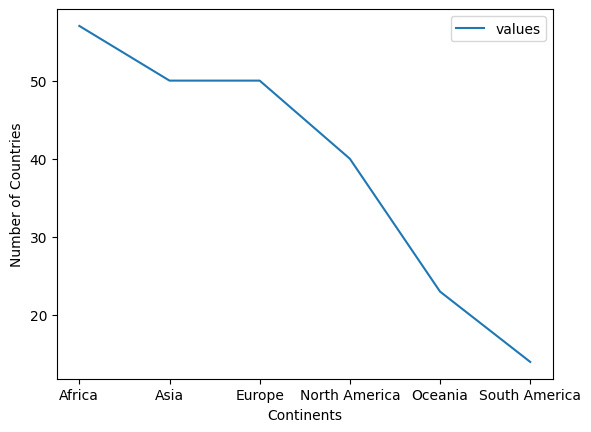

In [480]:
df.plot(kind = 'line', x='Continent', y = 'count',label='values' ,xlabel='Continents', ylabel='Number of Countries')

<Axes: ylabel='Continent'>

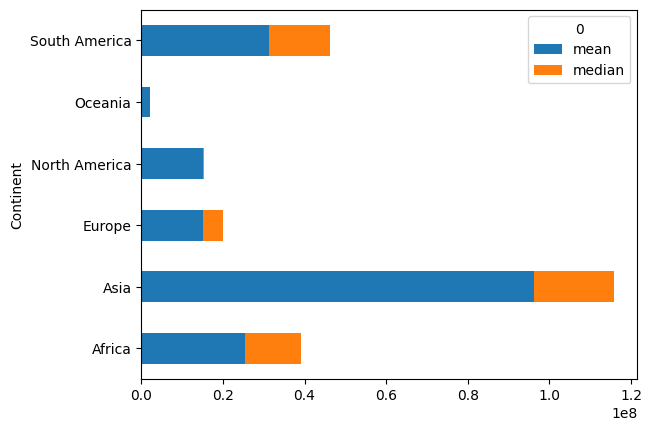

In [461]:
df.plot.barh(
    x='Continent',
    y=['mean','median'],
    stacked = True
    )

# - Central Tendancy: mean median mode
# - Spread: SD
# - Skewness:
# - Ditribution

In [462]:

# a = [10,9,9,8,11,12,13,100000]
# mean = 10000
# median = 10

### Data Cleaning

In [598]:
df = pd.read_excel('/Users/Z00CVY1/Documents/Python Tutorials/demo files/z_call_list.xlsx')
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No,True
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes,False
2,1003,Walter,/White,7066950392,298 Drugs Driveway,N,NaN,True
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y,True
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No,True
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes,True
6,1007,Jeff,Winger,NaN,1209 South Street,No,No,False
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No,False
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN,False
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No,True


In [599]:
df = df.drop_duplicates()
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No,True
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes,False
2,1003,Walter,/White,7066950392,298 Drugs Driveway,N,NaN,True
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y,True
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No,True
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes,True
6,1007,Jeff,Winger,NaN,1209 South Street,No,No,False
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No,False
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN,False
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No,True


In [600]:
df = df.drop(columns = "Not_Useful_Column")
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes
2,1003,Walter,/White,7066950392,298 Drugs Driveway,N,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes
6,1007,Jeff,Winger,NaN,1209 South Street,No,No
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No


In [601]:
df['Last_Name'] = df["Last_Name"].str.replace('NaN','')
# df['Last_Name']

# NaN -> None Null

In [602]:
# 1. Missing Values - IDing, Solving
# 2. Data issues - IDing & Solving

In [603]:
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes
2,1003,Walter,/White,7066950392,298 Drugs Driveway,N,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes
6,1007,Jeff,Winger,NaN,1209 South Street,No,No
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No


100k records

20 patterns in problems 
18/20 -> 20k records


2/20 -> 80k records

In [604]:
df['Last_Name'] = df['Last_Name'].fillna('')
df['Last_Name']

0         Baggins
1           Nadir
2          /White
3         Schrute
4            Snow
5         Swanson
6          Winger
7          Holmes
8                
9          Parker
10         Gamgee
11      ...Potter
12         Draper
13          Knope
14    Flenderson_
15        Weasley
16          Scott
17           Kent
18         Braton
19      Skywalker
Name: Last_Name, dtype: object

In [605]:
df["Phone_Number"] = df["Phone_Number"].fillna('')

df["Phone_Number"] = df["Phone_Number"].str.replace('/','')
df["Phone_Number"] = df["Phone_Number"].str.replace('|','')
df["Phone_Number"] = df["Phone_Number"].str.replace('N-a','')
df["Phone_Number"] = df["Phone_Number"].str.replace('Na','')
df


,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No
1,1002,Abed,Nadir,1236439775,93 West Main Street,No,Yes
2,1003,Walter,/White,NaN,298 Drugs Driveway,N,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y
4,1005,Jon,Snow,8766783469,123 Dragons Road,Y,No
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes
6,1007,Jeff,Winger,,1209 South Street,No,No
7,1008,Sherlock,Holmes,8766783469,98 Clue Drive,N,No
8,1009,Gandalf,,,123 Middle Earth,Yes,NaN
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No


In [606]:
df["Do_Not_Contact"] = df["Do_Not_Contact"].str.replace('Yes','Y')

df["Do_Not_Contact"] = df["Do_Not_Contact"].str.replace('No','N')


df["Paying Customer"] = df["Paying Customer"].str.replace('Yes','Y')

df["Paying Customer"] = df["Paying Customer"].str.replace('No','N')
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Y,N
1,1002,Abed,Nadir,1236439775,93 West Main Street,N,Y
2,1003,Walter,/White,NaN,298 Drugs Driveway,N,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Y,Y
4,1005,Jon,Snow,8766783469,123 Dragons Road,Y,N
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Y,Y
6,1007,Jeff,Winger,,1209 South Street,N,N
7,1008,Sherlock,Holmes,8766783469,98 Clue Drive,N,N
8,1009,Gandalf,,,123 Middle Earth,Y,NaN
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Y,N


In [607]:
#df = df.replace('N/a','')
#df = df.replace('NaN','')


df['Do_Not_Contact']=df['Do_Not_Contact'].fillna('')
df['Paying Customer']=df['Paying Customer'].fillna('')
df['Do_Not_Contact']=df['Do_Not_Contact'].replace('N/a','')
df['Paying Customer']=df['Paying Customer'].replace('N/a','')
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Y,N
1,1002,Abed,Nadir,1236439775,93 West Main Street,N,Y
2,1003,Walter,/White,NaN,298 Drugs Driveway,N,
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Y,Y
4,1005,Jon,Snow,8766783469,123 Dragons Road,Y,N
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Y,Y
6,1007,Jeff,Winger,,1209 South Street,N,N
7,1008,Sherlock,Holmes,8766783469,98 Clue Drive,N,N
8,1009,Gandalf,,,123 Middle Earth,Y,
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Y,N


In [608]:
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Y,N
1,1002,Abed,Nadir,1236439775,93 West Main Street,N,Y
2,1003,Walter,/White,NaN,298 Drugs Driveway,N,
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Y,Y
4,1005,Jon,Snow,8766783469,123 Dragons Road,Y,N
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Y,Y
6,1007,Jeff,Winger,,1209 South Street,N,N
7,1008,Sherlock,Holmes,8766783469,98 Clue Drive,N,N
8,1009,Gandalf,,,123 Middle Earth,Y,
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Y,N


In [609]:
for x in df.index:
    if df.loc[x, "Do_Not_Contact"] != 'N':
        
        df.drop(x, inplace=True)

df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Y,N
4,1005,Jon,Snow,8766783469,123 Dragons Road,Y,N
6,1007,Jeff,Winger,,1209 South Street,N,N
7,1008,Sherlock,Holmes,8766783469,98 Clue Drive,N,N
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Y,N
10,1011,Samwise,Gamgee,,"612 Shire Lane, Shire",Y,N
12,1013,Don,Draper,123-543-2345,2039 Main Street,Y,N
13,1014,Leslie,Knope,8766783469,343 City Parkway,Y,N
14,1015,Toby,Flenderson_,304-762-2467,214 HR Avenue,N,N
15,1016,Ron,Weasley,123-545-5421,2395 Hogwarts Avenue,N,N


In [610]:
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Y,N
4,1005,Jon,Snow,8766783469,123 Dragons Road,Y,N
6,1007,Jeff,Winger,,1209 South Street,N,N
7,1008,Sherlock,Holmes,8766783469,98 Clue Drive,N,N
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Y,N
10,1011,Samwise,Gamgee,,"612 Shire Lane, Shire",Y,N
12,1013,Don,Draper,123-543-2345,2039 Main Street,Y,N
13,1014,Leslie,Knope,8766783469,343 City Parkway,Y,N
14,1015,Toby,Flenderson_,304-762-2467,214 HR Avenue,N,N
15,1016,Ron,Weasley,123-545-5421,2395 Hogwarts Avenue,N,N


In [611]:
for x in df.index:
    if df.loc[x, "Paying Customer"] == 'Y':
        df.drop(x, inplace=True)



In [612]:
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
6,1007,Jeff,Winger,,1209 South Street,N,N
7,1008,Sherlock,Holmes,8766783469,98 Clue Drive,N,N
14,1015,Toby,Flenderson_,304-762-2467,214 HR Avenue,N,N
15,1016,Ron,Weasley,123-545-5421,2395 Hogwarts Avenue,N,N


In [629]:
for x in df.index:
    if df.loc[x, "Phone_Number"] == '':
        df.drop(x, inplace=True)

In [630]:
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
7,1008,Sherlock,Holmes,8766783469,98 Clue Drive,N,N
14,1015,Toby,Flenderson_,304-762-2467,214 HR Avenue,N,N
15,1016,Ron,Weasley,123-545-5421,2395 Hogwarts Avenue,N,N


In [628]:
# fix this pleas
#Another way to drop null values
df1 = df['Phone_Number'].dropna()


In [626]:
df1

6                 
7       8766783469
14    304-762-2467
15    123-545-5421
Name: Phone_Number, dtype: object

In [ ]:
df = df.reset_index(drop=True)
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Street_Address,State,Zip_Code
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Y,N,123 Shire Lane,Shire,
1,1005,Jon,Snow,876-678-3469,123 Dragons Road,Y,N,123 Dragons Road,,
2,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,N,N,98 Clue Drive,,
3,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Y,N,25th Main Street,New York,
4,1013,Don,Draper,123-543-2345,2039 Main Street,Y,N,2039 Main Street,,
5,1014,Leslie,Knope,876-678-3469,343 City Parkway,Y,N,343 City Parkway,,
6,1015,Toby,Flenderson,304-762-2467,214 HR Avenue,N,N,214 HR Avenue,,
7,1016,Ron,Weasley,123-545-5421,2395 Hogwarts Avenue,N,N,2395 Hogwarts Avenue,,
8,1017,Michael,Scott,123-643-9775,"121 Paper Avenue, Pennsylvania",Y,N,121 Paper Avenue,Pennsylvania,
9,1020,Anakin,Skywalker,876-678-3469,"910 Tatooine Road, Tatooine",Y,N,910 Tatooine Road,Tatooine,


Getting Data

1. Website API
2. Webscrapping 
3. Dataportals - Kaggle, wikipedia, data.gov.in, data.



Don't do: 
House price prediction kind of stuff

Do:
That general public audience will benefit from

## EDA Assignment

#### What's EDA

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.


We have not yet discussed about discovering patterns, spotting anomalies, testing hypothesis and to checking assumptions. So feel free to reduce the scope of this assignment to Data Cleaning and basic processing. Try to understand what the data is about. Try to see if you find any patters(and anomalies that deviate from the pattern)

Try to justify the patterns you are observing. Document findings - Consult with domain experts - try to uncover insights.

Let's have a 15-20minute slot in next session to share your work.


##### What kind of dataset to choose?

**Why do this assignment?**

Personally, I enjoy EDA process very much because it's like conversing with the data and that is a key skill that differentiates data and non data people.

Primary benefits:
1. Getting better in Pandas. Because you will never feel bad about knowing too much in Pandas.
2. Improve you data acumen

Additional Benefits from doing this exercise:
1. You can make LinkedIn posts about these - Helps during Job search
2. You can make social media content on these - Might be your starting point to add an additional source of income

##### Datasource Repositories

https://data.gov.in
https://data.gov
https://www.census.gov
https://www.kaggle.com/


### (Assignment) 2

A short introduction about yourself. 
No word counts*

https://www.kaggle.com/datasets/andrewgeorgeissac/hotels-in-munnar-kerala